# Baseball Playoff Prediction

Goal: Create a machine learning model to predict if a MLB team would make the playoffs.  
Dataset: MLB team standard batting statistics from 2000 to 2024. 

### Import Necessary Packages

In [1]:
# data analysis
import numpy as np
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Load in Data

In [2]:
pd.set_option('display.max_columns', 32)

# read in data
df = pd.read_csv('../data/mlb_batting_statistics.csv', index_col=[0])
df.head()

,Year,Tm,#Bat,BatAge,R/G,G,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,LOB,Postseason
0,2000,Anaheim Angels,45,27.6,5.33,162,6373,5628,864,1574,309,34,236,837,93,52,608,1024,0.280,0.352,0.472,0.825,105,2659,126,47,47,43,43,1173,False
1,2000,Arizona Diamondbacks,41,30.8,4.89,162,6241,5527,792,1466,282,44,179,756,97,44,535,975,0.265,0.333,0.429,0.763,88,2373,114,59,61,58,37,1128,False
2,2000,Atlanta Braves,47,30.8,5.00,162,6275,5489,810,1490,274,26,179,758,148,56,595,1010,0.271,0.346,0.429,0.775,95,2353,127,59,87,45,38,1192,True
3,2000,Baltimore Orioles,50,32.1,4.90,162,6238,5549,794,1508,310,22,184,750,126,65,558,900,0.272,0.341,0.435,0.776,100,2414,148,49,27,54,34,1129,False
4,2000,Boston Red Sox,52,29.3,4.89,162,6371,5630,792,1503,316,32,167,755,43,30,611,1019,0.267,0.341,0.423,0.764,90,2384,115,42,40,48,40,1226,False


### Data Wrangling

In [3]:
# drop 2020 season data (shorten season)
df = df[df['Year'] != 2020]

In [4]:
# shape of dataset
df.shape

(720, 31)

In [5]:
# summary statistics of dataset
df.describe()

,Year,#Bat,BatAge,R/G,G,PA,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,BA,OBP,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB,LOB
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,2011.666667,48.334722,28.657639,4.553736,161.961111,6190.141667,5524.195833,737.504167,1420.222222,283.473611,28.500000,175.776389,702.913889,93.088889,35.138889,520.306944,1200.938889,0.256946,0.325071,0.413956,0.739026,97.190278,2288.025000,122.688889,59.077778,42.220833,43.152778,35.252778,1125.502778
std,7.173588,6.239130,1.312716,0.508676,0.295801,121.707666,85.153607,82.485823,90.589819,28.920146,9.142665,36.692365,80.331170,31.463211,11.083832,68.875158,175.185550,0.013215,0.014756,0.026933,0.039390,8.404328,170.719893,16.535641,15.056576,22.783552,8.587697,15.937814,60.120903
min,2000.000000,34.000000,25.400000,3.130000,161.000000,5856.000000,5210.000000,507.000000,1147.000000,201.000000,5.000000,91.000000,485.000000,19.000000,10.000000,363.000000,805.000000,0.216000,0.278000,0.335000,0.618000,73.000000,1810.000000,71.000000,26.000000,1.000000,23.000000,4.000000,965.000000
25%,2005.750000,44.000000,27.800000,4.210000,162.000000,6104.000000,5468.000000,681.750000,1355.750000,265.000000,22.000000,150.000000,650.000000,69.000000,27.000000,471.000000,1062.000000,0.248000,0.315000,0.395000,0.710000,91.000000,2169.000000,112.000000,49.000000,24.000000,37.000000,24.000000,1085.000000
50%,2011.500000,48.000000,28.600000,4.540000,162.000000,6188.500000,5524.000000,734.000000,1418.000000,282.000000,28.000000,172.000000,697.000000,89.000000,34.000000,519.000000,1192.000000,0.257000,0.324500,0.413000,0.739000,97.000000,2289.500000,123.000000,57.000000,40.000000,42.000000,34.000000,1123.000000
75%,2017.250000,52.000000,29.500000,4.880000,162.000000,6273.000000,5578.250000,790.250000,1481.000000,302.000000,34.000000,200.000000,756.000000,113.250000,42.000000,565.000000,1330.250000,0.266250,0.335000,0.432000,0.764250,102.000000,2400.000000,134.000000,68.000000,60.000000,49.000000,45.000000,1165.250000
max,2024.000000,70.000000,33.500000,6.040000,163.000000,6537.000000,5770.000000,978.000000,1667.000000,376.000000,61.000000,307.000000,932.000000,223.000000,74.000000,775.000000,1654.000000,0.294000,0.367000,0.501000,0.851000,126.000000,2832.000000,170.000000,116.000000,119.000000,75.000000,153.000000,1301.000000


### Data Visualization

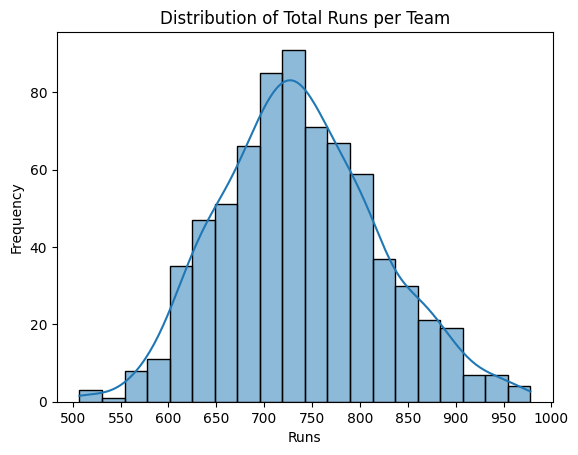

In [6]:
sns.histplot(df, x='R', kde=True)
plt.title('Distribution of Total Runs per Team')
plt.xlabel('Runs')
plt.ylabel('Frequency')
plt.xticks(np.arange(500, 1050, 50))
plt.show()

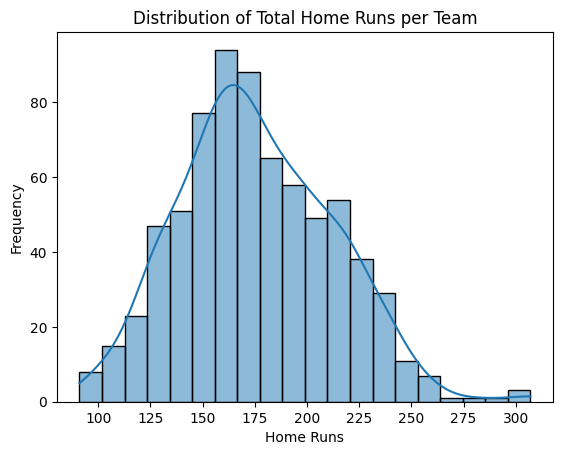

In [7]:
sns.histplot(df, x='HR', kde=True)
plt.title('Distribution of Total Home Runs per Team')
plt.xlabel('Home Runs')
plt.ylabel('Frequency')
plt.xticks(np.arange(100, 325, 25))
plt.show()

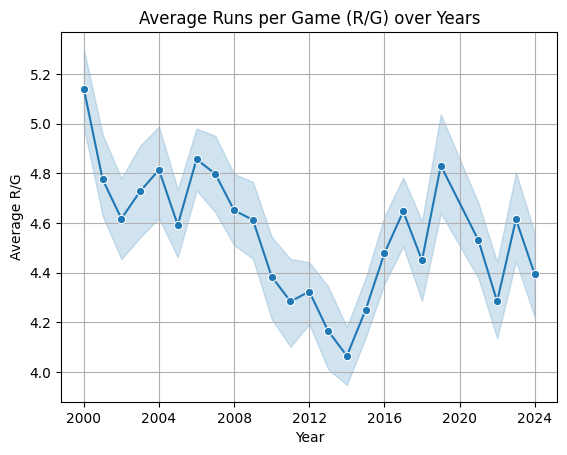

In [8]:
sns.lineplot(data=df, x='Year', y='R/G', marker='o')
plt.title('Average Runs per Game (R/G) over Years')
plt.xlabel('Year')
plt.ylabel('Average R/G')
plt.xticks(np.arange(2000, 2028, 4))
plt.grid()
plt.show()

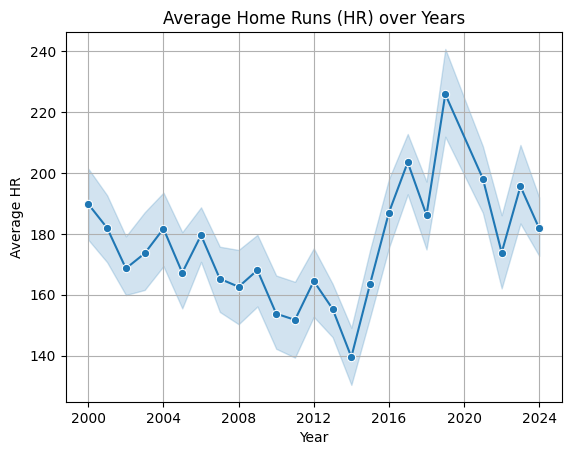

In [9]:
sns.lineplot(data=df, x='Year', y='HR', marker='o')
plt.title('Average Home Runs (HR) over Years')
plt.xlabel('Year')
plt.ylabel('Average HR')
plt.xticks(np.arange(2000, 2028, 4))
plt.grid()
plt.show()

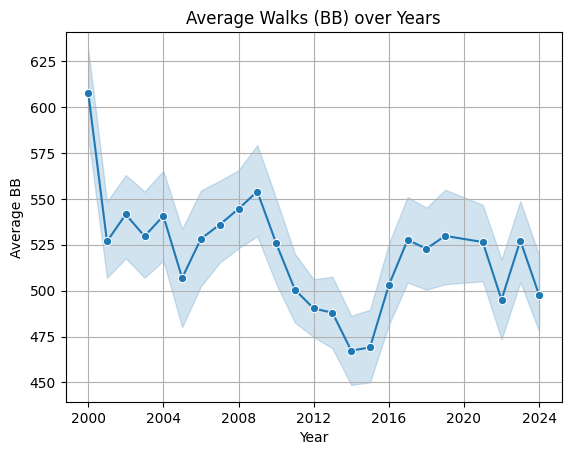

In [10]:
sns.lineplot(data=df, x='Year', y='BB', marker='o')
plt.title('Average Walks (BB) over Years')
plt.xlabel('Year')
plt.ylabel('Average BB')
plt.xticks(np.arange(2000, 2028, 4))
plt.grid()
plt.show()

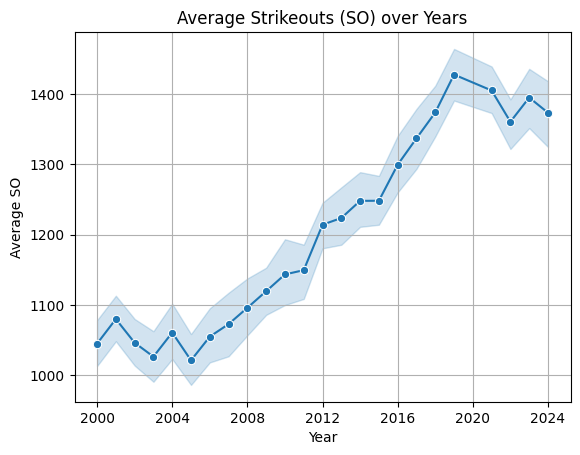

In [11]:
sns.lineplot(data=df, x='Year', y='SO', marker='o')
plt.title('Average Strikeouts (SO) over Years')
plt.xlabel('Year')
plt.ylabel('Average SO')
plt.xticks(np.arange(2000, 2028, 4))
plt.grid()
plt.show()

Text(0, 0.5, 'OPS (On-Base Plus Slugging)')

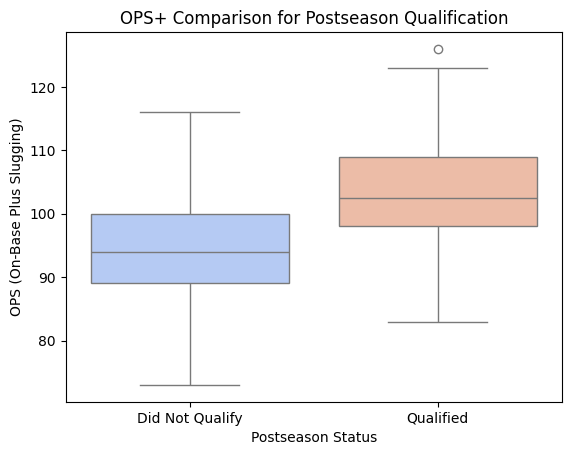

In [12]:
sns.boxplot(data=df, x='Postseason', y='OPS+', hue='Postseason', legend=False, palette='coolwarm')
plt.xticks([0,1], ['Did Not Qualify', 'Qualified'])
plt.title('OPS+ Comparison for Postseason Qualification')
plt.xlabel('Postseason Status')
plt.ylabel('OPS (On-Base Plus Slugging)')

Text(0, 0.5, 'TB (Total Bases)')

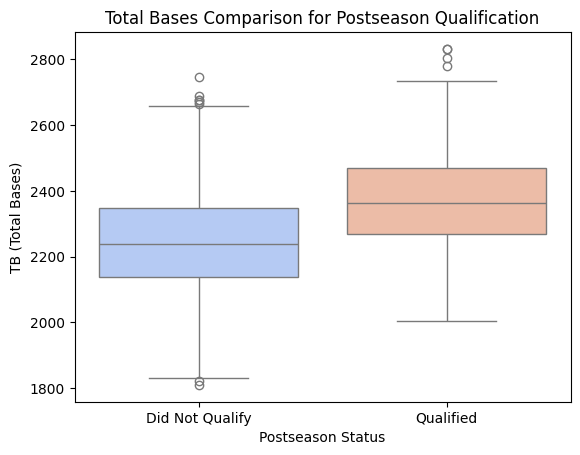

In [13]:
sns.boxplot(data=df, x='Postseason', y='TB', hue='Postseason', legend=False, palette='coolwarm')
plt.xticks([0,1], ['Did Not Qualify', 'Qualified'])
plt.title('Total Bases Comparison for Postseason Qualification')
plt.xlabel('Postseason Status')
plt.ylabel('TB (Total Bases)')

Text(0, 0.5, 'BB (Walks)')

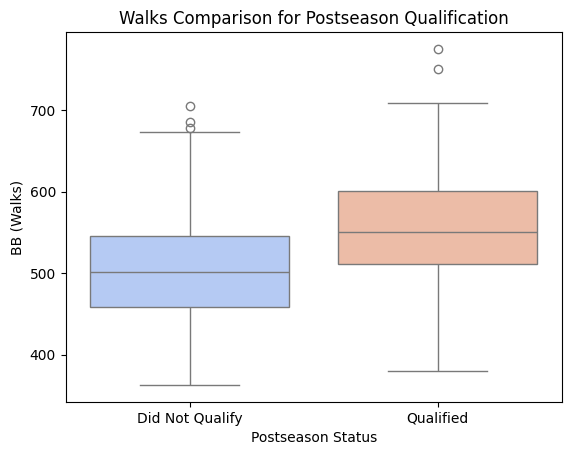

In [14]:
sns.boxplot(data=df, x='Postseason', y='BB', hue='Postseason', legend=False, palette='coolwarm')
plt.xticks([0,1], ['Did Not Qualify', 'Qualified'])
plt.title('Walks Comparison for Postseason Qualification')
plt.xlabel('Postseason Status')
plt.ylabel('BB (Walks)')

Text(0, 0.5, 'SO (Strikeouts)')

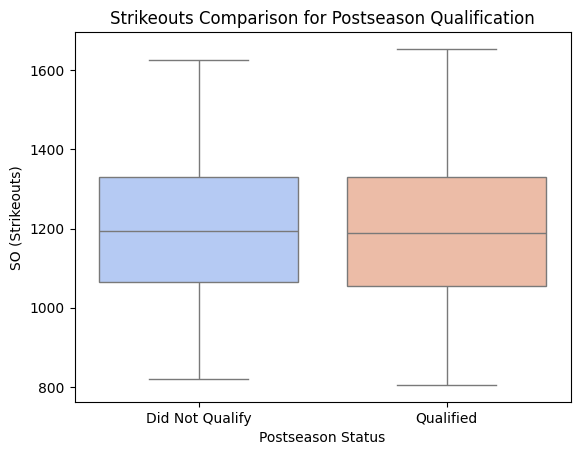

In [15]:
sns.boxplot(data=df, x='Postseason', y='SO', hue='Postseason', legend=False, palette='coolwarm')
plt.xticks([0,1], ['Did Not Qualify', 'Qualified'])
plt.title('Strikeouts Comparison for Postseason Qualification')
plt.xlabel('Postseason Status')
plt.ylabel('SO (Strikeouts)')

Text(0.5, 1.0, 'Correlation Heatmap of MLB Batting Metrics')

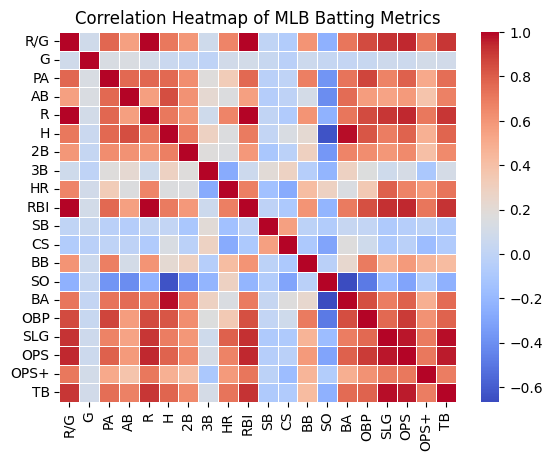

In [16]:
sns.heatmap(df.iloc[:, 4:-7].corr(), cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of MLB Batting Metrics')

### Feature Engineering

In [17]:
# preprocessing 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [18]:
# drop categorical columns
df_clean = df.drop(columns=['Tm'])
df_clean['Postseason'] = df_clean['Postseason'].astype('int')

In [19]:
# select the features and target 
X = df_clean.drop(columns=['Postseason'])
y = df_clean['Postseason']

# standardize the feature set with mean 0 and variance 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# apply principal component analysis
pca = PCA()
# fit PCA on the standardized data
pca.fit(X_scaled)

# set the threshold for explained variance 
threshold = 0.92
# cumulative sum of explained variance ratios
explained_variance_ratio = pca.explained_variance_ratio_.cumsum()
# find the minimum number of principal components to exceed threshold
optimal_components = (explained_variance_ratio >= threshold).argmax() + 1

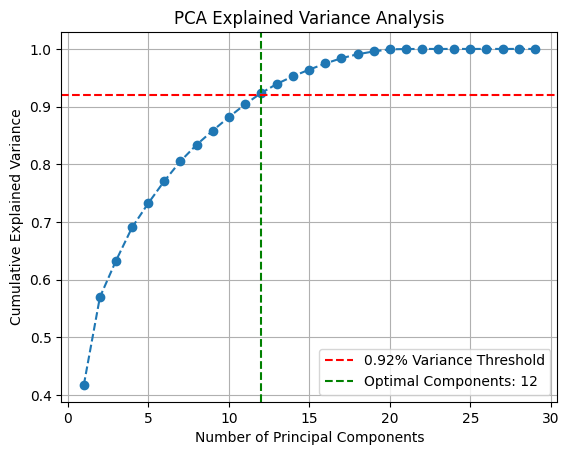

In [20]:
# plot showing optimal components based on threshold
plt.plot(np.arange(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.axhline(y=threshold, color='r', linestyle='--', label=f'{threshold}% Variance Threshold')
plt.axvline(x=optimal_components, color='g', linestyle='--', label=f'Optimal Components: {optimal_components}')
plt.title('PCA Explained Variance Analysis')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.grid()
plt.show()

In [21]:
loadings = pd.DataFrame(pca.components_[:optimal_components], columns=X.columns)

# get the top 5 features for each principal component
top_features_per_component = {}
for i in range(optimal_components):
    top_features = loadings.iloc[i].abs().nlargest(5).index.tolist()
    top_features_per_component[f'PC{i+1}'] = top_features

# print results
print(f'Optimal number of components: {optimal_components}')
for pc, features in top_features_per_component.items():
    print(f'{pc}: {features}')

Optimal number of components: 12
PC1: ['OPS', 'OBP', 'R', 'R/G', 'TB']
PC2: ['HR', 'SH', 'Year', 'SO', 'IBB']
PC3: ['SB', 'CS', 'BatAge', '3B', 'LOB']
PC4: ['BB', 'GDP', 'SB', 'AB', 'HBP']
PC5: ['BatAge', '3B', 'GDP', 'SO', 'CS']
PC6: ['G', 'SF', 'HR', 'SH', 'LOB']
PC7: ['G', 'SF', 'HR', 'SH', 'LOB']
PC8: ['HBP', 'SF', 'BatAge', 'BB', 'CS']
PC9: ['SF', 'HBP', '3B', 'BatAge', 'BB']
PC10: ['BatAge', 'GDP', 'AB', 'SF', 'SB']
PC11: ['#Bat', '3B', 'GDP', 'BatAge', 'SF']
PC12: ['3B', '2B', 'Year', '#Bat', 'OPS+']


### Model Building

In [22]:
# model selection
from sklearn.model_selection import train_test_split, GridSearchCV

# classification models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# model evaluation
from sklearn.metrics import classification_report

In [23]:
# apply PCA with optimal number of components
pca_optimal = PCA(n_components=optimal_components)
# fit and transform the scaled data
X_pca_optimal = pca_optimal.fit_transform(X_scaled)

# split the dataset in training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_pca_optimal, y, test_size=0.20, random_state=42)

In [24]:
# shape of training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((576, 12), (144, 12), (576,), (144,))

In [25]:
# define hyperparameter grids 
param_grids = {
    'Logistic Regression': {
        'model': LogisticRegression(random_state=42),
        'params': {
            'C': np.arange(0.1, 5.1, 0.1),
            'penalty': ['l1', 'l2'],
            'solver': ['liblinear']
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'criterion': ['gini', 'entropy'],
            'max_depth': [None] + list(range(1,21)),
            'min_samples_split': np.arange(2, 11, 1),
            'min_samples_leaf': np.arange(1, 10, 1)
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': np.arange(50, 225, 25),
            'criterion': ['gini', 'entropy'],
            'max_depth': [None, 2, 5, 10, 20],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 3, 5]
        }
    },
    'SVM': {
        'model': SVC(random_state=42),
        'params': {
            'C': np.arange(0.1, 5.1, 0.1),
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'gamma': ['scale', 'auto']
        }
    }
}

In [26]:
# store model performance scores and best hyperparameters
scores = []
# store the best trained models
best_models = {}

# iterate over each model and perform grid search with cross-validation
for name, config in param_grids.items():
    grid_search = GridSearchCV(config['model'], config['params'], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    scores.append({
        'model': name,
        'best_score': grid_search.best_score_,
        'best_params': grid_search.best_params_
    })
    best_models[name] = grid_search.best_estimator_

In [27]:
pd.set_option('display.max_colwidth', None)

# create dataframe to show each models' best score and best parameters 
pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

,model,best_score,best_params
0,Logistic Regression,0.770885,"{'C': 1.1, 'penalty': 'l1', 'solver': 'liblinear'}"
1,Decision Tree,0.736177,"{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 8, 'min_samples_split': 2}"
2,Random Forest,0.772609,"{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 100}"
3,SVM,0.779535,"{'C': 1.2000000000000002, 'gamma': 'scale', 'kernel': 'linear'}"


### Model Evaluation

In [28]:
# print detailed classification reports for each model
for name, model in best_models.items():
    print(f'\nEvaluating {name} on the test set:')
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))


Evaluating Logistic Regression on the test set:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       103
           1       0.85      0.56      0.68        41

    accuracy                           0.85       144
   macro avg       0.85      0.76      0.79       144
weighted avg       0.85      0.85      0.84       144


Evaluating Decision Tree on the test set:
              precision    recall  f1-score   support

           0       0.76      0.86      0.81       103
           1       0.48      0.32      0.38        41

    accuracy                           0.71       144
   macro avg       0.62      0.59      0.60       144
weighted avg       0.68      0.71      0.69       144


Evaluating Random Forest on the test set:
              precision    recall  f1-score   support

           0       0.80      0.93      0.86       103
           1       0.71      0.41      0.52        41

    accuracy                           0.78    

### Best Performing Model

In [29]:
# best model
best_models['Logistic Regression']

LogisticRegression(C=np.float64(1.1), penalty='l1', random_state=42,
                   solver='liblinear')